### 1. Cài đặt thư viện, dataset và dữ liệu stopword

In [ ]:
%pip install underthesea pandas seaborn matplotlib

In [22]:
%pip install gdown
!gdown --folder 16o5UrpOLP2IpD6gjXKkKqJB5jyrYqhfJ

Note: you may need to restart the kernel to use updated packages.
Retrieving folder contents
Processing file 19i8W9vvO9LDS3QzvXpkEPytdUg9iGwQF README.md
Processing file 1fGgS8JbOgYXoamL-QaLxWmxT-JfiHX0W test.tsv
Processing file 1IUTvsv8O799mHNMVGNgVgT_WWUsIMRU3 train.tsv
Processing file 1V2NKfrAIWAPkEWnZqxEMC3eIT29zR-FM val.tsv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=19i8W9vvO9LDS3QzvXpkEPytdUg9iGwQF
To: /home/lamhung/class_courses/Truy hồi thông tin web/Thực hành/truy_hoi_thong_tin_web/th5/08/README.md
100%|██████████████████████████████████████████| 909/909 [00:00<00:00, 8.57MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGgS8JbOgYXoamL-QaLxWmxT-JfiHX0W
To: /home/lamhung/class_courses/Truy hồi thông tin web/Thực hành/truy_hoi_thong_tin_web/th5/08/test.tsv
100%|██████████████████████████████████████| 2.25M/2.25M [00:00<00:00, 2.51MB/s]
Downloading...
From: h

In [24]:
!wget https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/refs/heads/master/vietnamese-stopwords.txt -O vietnamese-stopwords.txt

--2025-10-20 10:33:11--  https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/refs/heads/master/vietnamese-stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20475 (20K) [text/plain]
Saving to: ‘vietnamese-stopwords.txt’

vietnamese-stopword 100%[===================>]  20.00K  --.-KB/s    in 0.01s   

2025-10-20 10:33:11 (1.55 MB/s) - ‘vietnamese-stopwords.txt’ saved [20475/20475]



### 2. Load dữ liệu và khám phá dữ liệu

In [30]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import underthesea
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
train = pd.read_csv("/home/lamhung/class_courses/Truy hồi thông tin web/Thực hành/truy_hoi_thong_tin_web/th5/08/train.tsv", sep='\t',header=None, names=['text','label'])
test = pd.read_csv("/home/lamhung/class_courses/Truy hồi thông tin web/Thực hành/truy_hoi_thong_tin_web/th5/08/val.tsv", sep='\t',header=None, names=['text','label'])

In [3]:
train.shape

(31745, 2)

In [4]:
test.shape

(4490, 2)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31745 entries, 0 to 31744
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    31745 non-null  object
 1   label   31745 non-null  object
dtypes: object(2)
memory usage: 496.1+ KB


In [6]:
train.head()

,text,label
0,Ba Lan sa thải HLV Santos sau sáu trận. Liên đ...,thethao
1,Trữ trứng để sinh con được bao lâu?. Tôi 32 tu...,suckhoe
2,Thường xuyên đau lưng là bệnh gì?. Lưng vợ tôi...,suckhoe
3,Người mẹ bỏ chữa ung thư để tìm sự sống cho co...,doisong
4,"Nguy cơ Covid đồng nhiễm virus, vi khuẩn gây b...",suckhoe


In [7]:
train.iloc[0, :]

text     Ba Lan sa thải HLV Santos sau sáu trận. Liên đ...
label                                              thethao
Name: 0, dtype: object

In [8]:
train['label'].unique()

array(['thethao', 'suckhoe', 'doisong', 'giaoduc', 'khoahoc', 'thegioi',
       'thoisu', 'kinhte'], dtype=object)

In [9]:
train['label'].value_counts()

label
thegioi    6823
suckhoe    6766
thethao    5710
thoisu     3562
kinhte     3128
giaoduc    2180
khoahoc    1991
doisong    1585
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

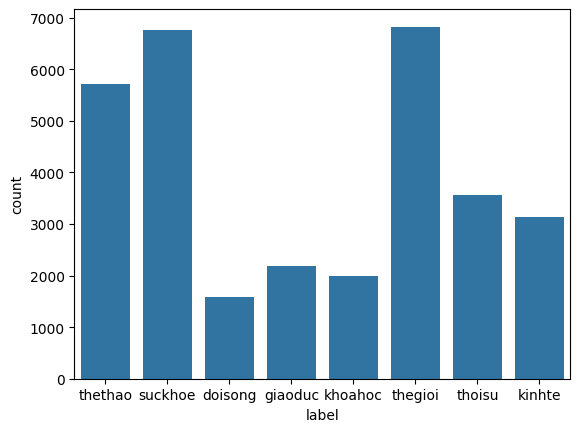

In [10]:
sns.countplot(data=train, x='label')

In [11]:
with open("vietnamese-stopwords.txt", "r", encoding="utf-8") as f:
    stopwords = set([line.strip() for line in f if line.strip() != ""])
    
def remove_vietnamese_stopwords(tokens: list[str]) -> list[str]:
    return [word for word in tokens if word not in stopwords]

def remove_punctuation(text: str) -> str:
    return text.translate(str.maketrans('', '', string.punctuation))

def process(text: str, return_tokens: bool = False):
    processed = remove_punctuation(text)
    processed = underthesea.word_tokenize(processed.strip(), format="text")
    processed = processed.split() if isinstance(processed, str) else list(processed)
    processed = remove_vietnamese_stopwords(processed)
    processed = [ text.lower() for text in processed]
    if return_tokens:
        return processed
    return " ".join(processed)

In [14]:
train['text'] = train['text'].apply(process)

In [ ]:
test['text'] = train['text'].apply(process)

In [20]:
le = LabelEncoder()
le.fit(test['label'])

LabelEncoder()

In [21]:
train['label'] = le.transform(train['label'])
test['label'] = le.transform(test['label'])

In [22]:
train

,text,label
0,ba_lan sa_thải hlv santos sáu trận liên_đoàn b...,6
1,trữ trứng sinh bao_lâu tôi 32 kết_hôn dự_định ...,4
2,thường_xuyên đau lưng bệnh lưng vợ đau âm_ỉ lư...,4
3,người mẹ chữa ung_thư sống nhận gái thiên_ân t...,0
4,nguy_cơ covid đồng nhiễm virus vi_khuẩn bệnh c...,4
...,...,...
31740,nhật_bản ra_sức vàng_son ngành chip_chi hàng c...,3
31741,ông bùi_hoàng_phương thứ_trưởng thông_tin truy...,7
31742,cựu vô_địch major đòi tẩy_chay giải golf náo_n...,6
31743,14 triết_lý sống nhật_người nhật đề_cao cân_bằ...,0


In [23]:
test

,text,label
0,ba_lan sa_thải hlv santos sáu trận liên_đoàn b...,7
1,trữ trứng sinh bao_lâu tôi 32 kết_hôn dự_định ...,0
2,thường_xuyên đau lưng bệnh lưng vợ đau âm_ỉ lư...,7
3,người mẹ chữa ung_thư sống nhận gái thiên_ân t...,5
4,nguy_cơ covid đồng nhiễm virus vi_khuẩn bệnh c...,4
...,...,...
4485,người hawaii trở đống tro tàn thảm_họa cháy rừ...,3
4486,đường dân tan_hoang sạt_lở kiên_giang khô_hạn ...,4
4487,mất thị_lực tổn_thương não uống sản_phẩm béo s...,6
4488,hlv hoàng_xuân_vinh hài_lòng học_trò asiad the...,3


In [24]:
X_train = train['text']
y_train = train['label']
X_test = test['text']
y_test = test['label']

In [36]:
print(X_train.shape)
print(X_test.shape)

(31745,)
(4490,)


In [31]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [34]:
print(X_train_vec.shape)
print(X_test_vec.shape)

(31745, 411657)
(4490, 411657)


=== Naive Bayes ===
Accuracy: 0.17126948775055678
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       270
           1       0.08      0.06      0.07       313
           2       0.06      0.03      0.04       302
           3       0.08      0.08      0.08       407
           4       0.21      0.25      0.23       944
           5       0.21      0.28      0.24       942
           6       0.19      0.19      0.19       805
           7       0.12      0.12      0.12       507

    accuracy                           0.17      4490
   macro avg       0.12      0.13      0.12      4490
weighted avg       0.15      0.17      0.16      4490



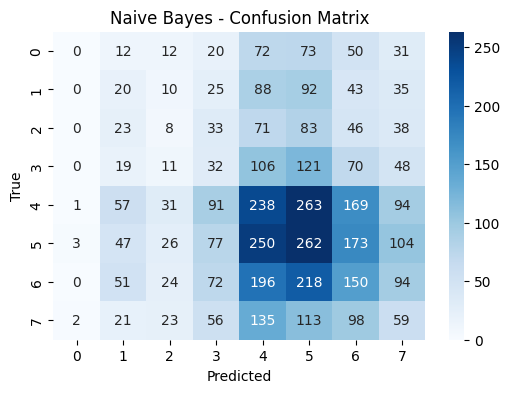

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train Naive Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X_train_vec, y_train)
y_pred_nb = nb_clf.predict(X_test_vec)

# Evaluation
print("=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Confusion matrix visualization
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap="Blues",
            xticklabels=nb_clf.classes_,
            yticklabels=nb_clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

=== SVM ===
Accuracy: 0.1599109131403118
              precision    recall  f1-score   support

           0       0.04      0.03      0.03       270
           1       0.07      0.07      0.07       313
           2       0.08      0.08      0.08       302
           3       0.08      0.09      0.09       407
           4       0.21      0.21      0.21       944
           5       0.22      0.23      0.23       942
           6       0.19      0.18      0.19       805
           7       0.11      0.11      0.11       507

    accuracy                           0.16      4490
   macro avg       0.13      0.13      0.13      4490
weighted avg       0.16      0.16      0.16      4490



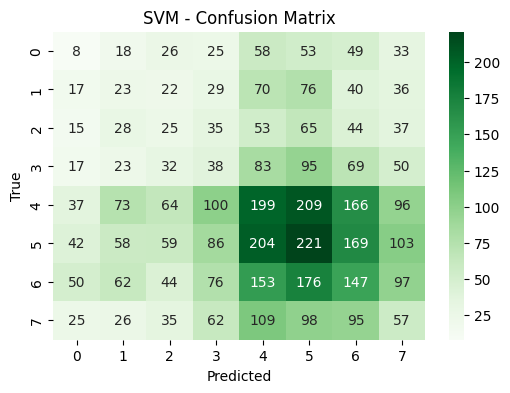

In [38]:
from sklearn.svm import LinearSVC

# Train SVM
svm_clf = LinearSVC()
svm_clf.fit(X_train_vec, y_train)
y_pred_svm = svm_clf.predict(X_test_vec)

# Evaluation
print("=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Confusion matrix visualization
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="Greens",
            xticklabels=svm_clf.classes_,
            yticklabels=svm_clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM - Confusion Matrix")
plt.show()

/tmp/ipykernel_51618/1349000359.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Naive Bayes", "SVM"], y=[acc_nb, acc_svm], palette="Set2")


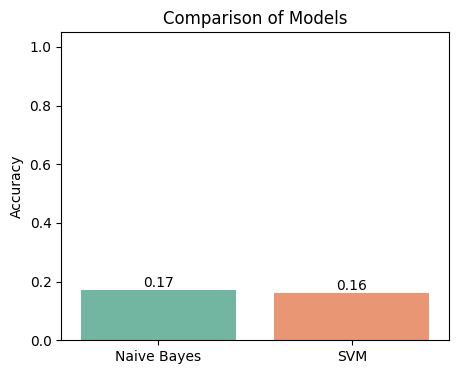

In [39]:
import numpy as np

acc_nb = accuracy_score(y_test, y_pred_nb)
acc_svm = accuracy_score(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.barplot(x=["Naive Bayes", "SVM"], y=[acc_nb, acc_svm], palette="Set2")
plt.ylabel("Accuracy")
plt.title("Comparison of Models")
for i, acc in enumerate([acc_nb, acc_svm]):
    plt.text(i, acc+0.01, f"{acc:.2f}", ha='center')
plt.ylim(0,1.05)
plt.show()